In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [158]:
df = pd.read_csv("german_credit_data.csv", index_col = None)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [159]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [160]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [162]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [163]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [164]:
for i in df.columns:
    print(df[i].value_counts())

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: Age, dtype: int64
male      690
female    310
Name: Sex, dtype: int64
2    630
1    200
3    148
0     22
Name: Job, dtype: int64
own     713
rent    179
free    108
Name: Housing, dtype: int64
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
1258    3
1478    3
1275    3
1393    3
1262    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: Credit amount,

In [165]:
numerical = [i for i in df.columns if df[i].dtype != 'O']
categorical = [i for i in df.columns if df[i].dtype == 'O']

In [166]:
numerical

['Age', 'Job', 'Credit amount', 'Duration']

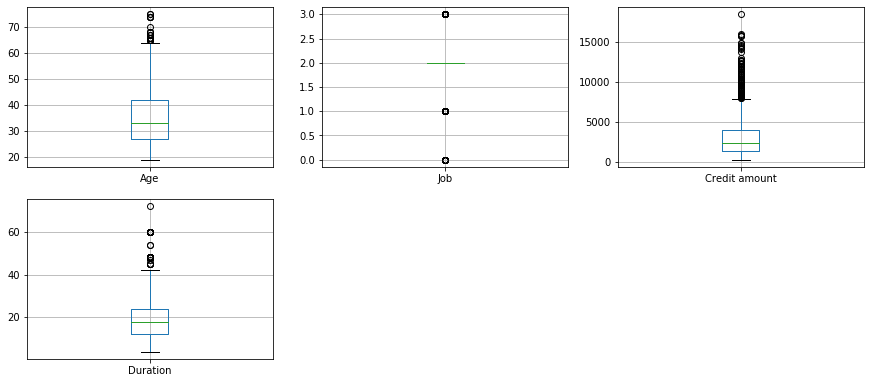

In [167]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

In [168]:
numerical1 = ["Age", "Credit amount", "Duration"]
for i in range(1, len(numerical1)+1):
    
    iqr = df[numerical1[i-1]].quantile(0.75) - df[numerical1[i-1]].quantile(0.25)
    min_val = df[numerical1[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical1[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical1[i-1]] = np.where(df[numerical1[i-1]] > max_val, max_val, df[numerical1[i-1]])
    df[numerical1[i-1]] = np.where(df[numerical1[i-1]] < min_val, min_val, df[numerical1[i-1]])

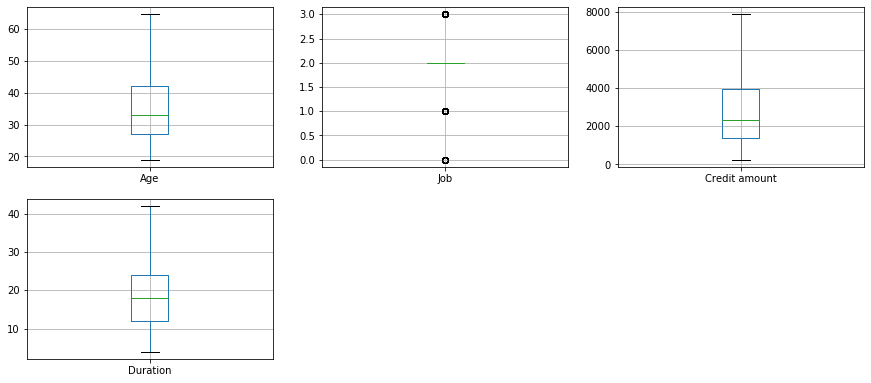

In [169]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

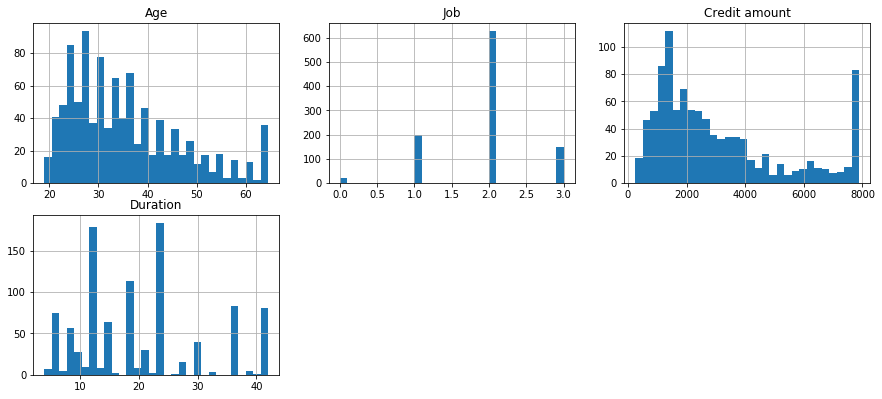

In [170]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [171]:
df[categorical].isnull().sum()

Sex                   0
Housing               0
Saving accounts     183
Checking account    394
Purpose               0
Risk                  0
dtype: int64

In [172]:
x = df.drop("Risk", axis = 1)
y = df["Risk"]

In [173]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


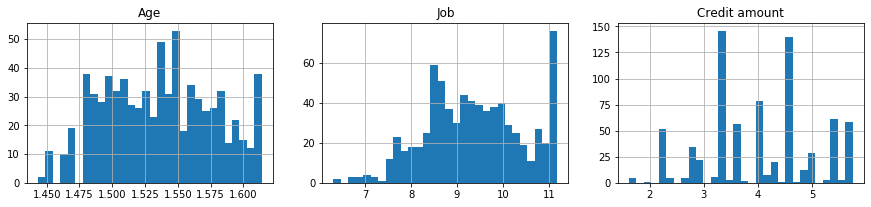

In [174]:
skew = numerical1
plt.figure(figsize = (15, 10))

for i in range(1, len(skew)+1):
    plt.subplot(3,3,i)
    xtrain[skew[i-1]] = stats.boxcox(xtrain[skew[i-1]])[0]
    xtest[skew[i-1]] = stats.boxcox(xtest[skew[i-1]])[0]
    fig = xtrain[skew[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])

# for i in range(1, len(skew)+1):
#     plt.subplot(3,3,i)
#     xtrain[skew[i-1]] = np.log(xtrain[skew[i-1]])
#     xtest[skew[i-1]] = np.log(xtest[skew[i-1]])
#     fig = xtrain[skew[i-1]].hist(bins = 30)
#     fig.set_title(skew[i-1])  


In [175]:
xtrain["Saving accounts"] = xtrain["Saving accounts"].fillna(xtrain["Saving accounts"].mode()[0])
xtest["Saving accounts"] = xtest["Saving accounts"].fillna(xtest["Saving accounts"].mode()[0])

xtrain["Checking account"] = xtrain["Checking account"].fillna(xtrain["Checking account"].mode()[0])
xtest["Checking account"] = xtest["Checking account"].fillna(xtest["Checking account"].mode()[0])

C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [176]:
xtrain.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [177]:
xtest.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [178]:
from category_encoders import OneHotEncoder as ohe

In [179]:
encoder = ohe(cols = categorical[:len(categorical)-1])
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

In [180]:
for i in xtrain:
    if i not in xtest:
        print(i)

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
preprocess = StandardScaler()
xtrain = preprocess.fit_transform(xtrain)
xtest = preprocess.fit_transform(xtest)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [184]:
names = ["logreg", "randomForest", "decisionTree", "SVC"]
models = []

models.append(LogisticRegression())
models.append(RandomForestClassifier(n_estimators = 100))
models.append(DecisionTreeClassifier())
models.append(SVC())

In [185]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [186]:
kfold = model_selection.KFold(n_splits = 5, random_state = 8, shuffle= True)

for i in range(len(models)):

    cvs = model_selection.cross_val_score(models[i], xtrain, ytrain, cv = kfold, scoring = "accuracy")
    score=models[i].fit(xtrain,ytrain)
    prediction = models[i].predict(xtest)
    acc_score = accuracy_score(ytest,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
logreg: 0.7
----------------------------------------
randomForest: 0.68
----------------------------------------
decisionTree: 0.548
----------------------------------------
SVC: 0.704
